# Introduzione al Reinforcement Learning - Tutorial in italiano
Mario Fiorino 

Il **Reinforcement Learning (RL)** è un campo del Machine Learning, in cui l'agente apprende, non attraverso un set di dati fisso, ma, interagendo con l'ambiente. In pratica si usa l'esperienza per guidare le decisioni future e conseguire determinati obiettivi

*Concetti principali:*

- ambiente
- segnale di ricompensa (Reward signal)
- agente
- insieme di azioni possibili (nota: le azioni possono avere conseguenze a lungo termine)
- stato agente
- politica (policy e apprendimento di "una optimal policy")
- uno stimatore (value function)
- modello del ambiente (che puo essere presente o meno)

*Key point* :

Apprendere una mappatura tra stati e azioni (o volendo determinare una optimal policy; cioè una sequenza di azioni) in modo da massimizzare il segnale di reward nel tempo.

Questo tipo di apprendimento è solitamente modellizzato tramite i [processi decisionali di Markov](https://it.wikipedia.org/wiki/Processo_decisionale_di_Markov#:~:text=I%20processi%20decisionali%20di%20Markov,il%20controllo%20di%20un%20decisore.)

*Dove è usata la tecnologia RL?*

Dalla finanza: pricing, trainign portafolio; al controllo robotico; alla gestion delle risorse: "adaptive decision control"; fino alla gestione dinamica dei Big Data  : "recommendation system".
Per maggiori info : [cliccare qui](https://www.v7labs.com/blog/reinforcement-learning-applications)


*Perché il RL è difficile?*

Una delle parti più difficili del RL è dover mappare l'ambiente e includere tutte le mosse possibili. Oltre a definire un segnale di reward adeguato ai propri scopi. Questo ci impone a pensare in termini di :

- conseguenze a lungo termine delle azioni
- raccogliere attivamente esperienza in modo utile
- affrontare l'incertezza del mondo esterno (informazioni parziali)

# Esempio intorduttivo e formalizzazione del problema

Per dare un'idea di cosa sia il RL, in questo notebook si utilizzerà Python per creare un ambiente molto semplice unidimensionale. L'agente "U", partendo dallo stato "I", deve imparare a raggiungere lo stato stato "G" (Goal), muovendosi a destra o sinistra.

[. I . . . . . G]

Ambiente può così essere rappresentato nel framework Markoviano:
- Insieme finito di 8 stati,  S: [0,1,2,3,4,5,6,7]. Dove l'ultimo stato, il 7, è il Goal da raggiungere. Stato iniziale S = 1
- Insieme di finito di 2 azioni discrete,  A : ["desta", "sinistra"]
- Funzione di transizione da uno stato all'altro, deterministica :  
   - input: (azione "destra", stato S)     -> output :    S+1
   - input: (azione "sinistra", stato S)   -> output :    S-1
   - input: (azione "sinistra", stato S=0) -> output :    S=0
   - Stato S = 7, fine.
- Segnale di Reward R(S,A). Cioè la ricompensa ottenuta partendo dallo stato S agendo secondo l’azione A. Anche questa funzione è determinisitca : 
    - per ogni spostamento; reward immediato = 0. 
    - in caso di raggiugimento dello stato S = 7 , reward immediato = +1

- Fattore GAMMA,  γ = "discount factort", è un iperparametro costante che tiene conto di possibilità di premi non immediati. Il suo valore è compreso tra 0 ed 1. In pratica la prima ricompensa che si ottiene è quella che pesa di più, poi mano a mano che si considerano reward più lontani nel tempo essi contribuiranno
sempre meno. Nel caso GAMMA ≈ 0 l'agente sarà “avido” considerando prevalentemente i premi immediati, opposto al caso GAMMA ≈ 1 in cui l'agente presterà attenzione alla ricompensa a lungo termine

Una "policy", spesso indicata con il simbolo π;  è una mappatura tra stati e azioni. In questo semplice esempio la "policy" è deterministica, ed è una semplice funzione : Stato -> Azione

Una "optimal policy" è definita come politica che sceglie le azioni nel tempo in modo da massimizzare il valore atteso del ritorno della funzione $G$ , chiamato anche "total discounted reward" :  

$G(S_{0},A_{0},S_{1},A_{1},S_{2},A_{2},... )$ =  $R_{0} + γ  R_{1} + γ^{2} R_{2} + . . . $

Cioè la somma pesata da GAMMA  dei reward ottenuti durante una sequenza finita di stati-azioni. Nota, per valori γ < 1  i reward più lontani nel tempo contribuiranno sempre meno 

Per trovare una "optimal policy" è necessario definire uno stimatore che ci dice quanto è buono lo stato $S_{t}$ in cui ci troviamo se seguiamo una certa policy $\pi$ . Gli stimatori più comuni sono:

-  State-value function : ci dice quanto è desiderabile essere in un certo stato in relazione alla sequenza di stati futuri che verranno raggiunti a partire da esso seguendo una certa policy :

$V_\pi (S_{t})$ =  $R_{t+1} + γ  R_{t+1} + γ^{2} R_{t+2} + + γ^{3} R_{t3}. . . $


- Action value function : questa valuta la bontà (o le conseguenze) di una certa azione in un determinato stato, a patto di seguire poi una certa policy :

$Q_\pi (S,A)$ =  $R(S,A) + V_\pi (S_{next(S,A)}) $

Dove $(S_{next(S,A)}) $ è lo stato in cui finisce l’agente eseguendo l’azione A stato S. Mentre $R(S,A)$ è immediato reward che ottiene eseguendo A in S.


Formalmente imparare una policy ("optimal policy") che massimizzi il valore del ritorno atteso da qualsiasi stato viene scritto: 

$\pi^{*}$ =  $ \underset{\pi}{\arg\max} \hspace{0.2cm}  V_\pi (S),  \hspace {0.7cm} \forall S $

# Q-learning 

Al fine di ottenere una "optimal policy" che risolva il problema proposto nel nostro sistema, in modo semplice; sarà usato l'algoritmo iterativo [Q-Learning](https://it.wikipedia.org/wiki/Q-learning). [Qui versione in inglese](https://towardsdatascience.com/reinforcement-learning-explained-visually-part-4-q-learning-step-by-step-b65efb731d3e). Questo di fatto ci consentirà di rappresentare sotto forma di tabella, per ogni stato del sistema, il valore della "Action value function", o anche detta "Q-fucntion".

*

*Un pò di teoria*: 


Q-learning fa parte di quella categoria di algoritmi classificati metodi "Temporal-Difference" (TD). I metodi TD nascono dalla combinazione di
due idee: Metodo Monte Carlo e di Programmazione Dinamica (DP). Come i metodi Monte Carlo,i metodi TD possono imparare direttamente dall'esperienza grezza senza un modello dell'ambiente. Come DP, i metodi TD aggiornano le stime basandosi in parte sulle stime apprese in precedenza (questa procedura è detta "Bootstrapping"); senza però, e questa è una distinzione importante, attendere la fine del processo epslorativo, o meglio la fine dell'episodio (in pratica gli "update" di questa metodologia sono basati su un "singolo campione" successore, e differiscono dagli aggiornamenti dei metodi DP, basati su una distribuzione completa di tutti i possibili successori). La relazione tra i metodi TD, DP e Monte Carlo sono un tema ricorrente nella teoria del RL.

La "update rule" generale di questa metodologia:

$ NewEstimate ↤ OldEstimate + StepSize [Target - OldEstimate]$

Più nello specifico, in un caso semplice TD(0):

$V(S_{t})  ↤ V(S_{t}) + α [R_{t+1} + γ V (S_{t+1}) - V(S_{t}) ]$


Il TD error misura la differenza tra i valori : $[R_{t+1} + γ V (S_{t+1})) - V(S_{t}) ]$ , e dipende dallo stato successivo e dalla prossima ricompensa, quindi non è disponibile fino allo step temporale successivo.

L'algoritmo Q-learning è di tipo : off-policy, ovvero che valuta o migliora una policy (detta "target policy")diversa da quella utilizzata per campionare i dati. (detta : "behaviour policy")



# Moduli importati

In [ ]:
import numpy as np
import pandas as pd
import time
import random 


# Formalismo Markoviano ed Iper-pametri

In [ ]:
N_STATES = 8  # numero di stati
ACTIONS = ['sinistra', 'destra']     # azioni disponibili

#IPER-PARAMETRI
EPSILON = 0.5   # gestisci ϵ-greedy policy
ALPHA = 0.1      # learning rate :  Il tasso di apprendimento determina con quale estensione le nuove informazioni acquisite sovrascriveranno le vecchie informazioni. Un fattore 0 impedirebbe all'agente di apprendere, al contrario un fattore pari ad 1 farebbe sì che l'agente si interessi solo delle informazioni recenti.
GAMMA = 0.9      # discount factor

MAX_EPISODES = 80   # episodi massimi
FRESH_TIME = 0.3    # fresh time display

# Q-table

Qui la costruzione della tabella-Q della Action value function. Ha una riga per ogni stato e una colonna per ogni azione. Ogni cella contiene il valore Q(S,A) stimato, in un determinato momento, per la corrispondente coppia di parametri : stato-azione. 

Si inizia inizializzando tutti i valori della tabella-Q a zero. Man mano che l'agente interagisce con l'ambiente e ottiene feedback, l'algoritmo migliora iterativamente questi valori Q finché non convergono ai valori Q ottimali.


*Note Tecniche*

In questo nootebook si fa usa della libreria Pandas. 
Un DataFrame è una struttura dati bidimensionale, cioè i dati sono allineati in modo tabulare in righe e colonne. Pandas DataFrame consiste di tre componenti principali, i dati, le righe e le colonne https://datascience.eu/it/programmazione/python-pandas-dataframe/


In [ ]:
def build_q_table(n_states, actions):
    
    my_data  =   np.zeros((n_states, len(actions))) # inizializziamo tutti i valori della tabella-q a 0
    
    
    #Come riempire una tabella con valori random :
    #my_data  =   np.ones((n_states, len(actions))) * np.random.rand(8,2)
    
    table = pd.DataFrame(
        data=my_data,     
        columns=actions,    # nomi delle colonne sono le sue azioni possibili
    )
    #print(table)    # otteniamo una tabella dove per ogni riga è indicato uno stato, ed ogni colonna un azione
    return table

# Funzione per generare "True Random Number"

In [ ]:
def gen_random():
  k = time.time()
  time.sleep(random.random()* 0.01)
  z = ( (k/time.time()) * random.random() )
  #print(z)
  return z

# Scegli un'azione, o la questione di " exploration vs exploitation" 

All’inizio l’agente eseguirà azioni casuali, in quanto non ha informazioni sul Q(s,a), il suo obiettivo sarà quindi di esplorare lo spazio stati-azioni al fine di riempire la Tabella-Q. Quando l’agente incomincerà a disporre di una quantità considerevole di informazioni su Q(s, a) potrebbe scegliere deterministicamente (evitando la scelta casuale), in modo "greedy" l’azione che lo porta ad un reward più alto.
Si noti che scegleindo sempre a caso l’azione da intraprendere, sfocerebbe in un costo computazionale enorme, ritardando la convergenza enormemente. Proprio per questo bisogna trovare un equilibrio fra lo sfruttamento delle informazioni di cui già si dispone ed il provare nuove soluzioni (" exploration vs exploitation" )

Approccio ϵ − greedy.

Dove ϵ è la probabilità di scegliere un'azione random invece di quella migliore, indicata dai valori che in quel momento popolano la tabella Q. 
In questo notebook tale scelta è vincolata in parte ai valori inziali della tabella Q. Se uguali a 0, o meno.



Aiuti Tecnici Pandas:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc


https://www.w3schools.com/python/pandas/ref_df_idxmax.asp

In [ ]:
def choose_action(state, q_table):
 
    state_actions = q_table.iloc[state] # prende tutti e due i valori della riga di un certo stato dato in ingresso: "state".
    # In pratica da qui esce la coppia di numeri float sotto le colonne ['sinistra', 'destra'], di un certo stato
     
    k = gen_random()
    #print("\t \t \t ",k, ((k > EPSILON) or (state_actions[0] == 0) or (state_actions[1] == 0)))

    #  Selezionare un’azione fra quelle possibili seguendo il criterio ϵ − greedy
    if (k > EPSILON) or (state_actions[0] == 0) or (state_actions[1] == 0) : 
                                 # ... or  (nel caso i valori della tabella-q sono ancoa a zero)    
        action_name = np.random.choice(ACTIONS)
    else:   
        action_name = state_actions.idxmax()    # Pandas sostituisce argmax con idxmax
        # agisce greedy, cioè da in uscita l'azione della riga "state_actions" con valore più alto
        print("\t  +++!exploitation!+++")
    return action_name

# Interazione con l'ambiente


Qui è implementata la funzione deterministica di transizione da uno stato all'altro:

- input: (azione "destra", stato S) -> output : S+1
- input: (azione "sinistra", stato S) -> output : S-1
- input: (azione "sinistra", stato S=0) -> output : S=0
- Stato S = 7, fine.



In [ ]:
def env_feedback(S, A):

    if A == 'destra':    
        if S == N_STATES - 2:   # controllo se si è prossimi alla fine
            S_next = S + 1      #Goal
            R = 1
        else:
            S_next = S + 1      # agente si muove verso destra
            R = 0
    else:   
        R = 0
        if S == 0:              # se agente è nello stato 0 rimane sul posto
            S_next= S  
        else:
            S_next = S - 1    # agente si muove verso sinsitra
    return S_next, R

# Semplice Interfaccia Grafica

Qui è sviluppata l'interfaccia grafica unidiemnsinale, ed i sui relativi update nel tempo.

[. . . U . . . G]


In [ ]:
def update_env(S):

    env_list = ['.']*(N_STATES-1) + ['G']       
    
    env_list[S] = 'U'
    interaction = ''.join(env_list)
    print('\r{}'.format(interaction), end='')
    time.sleep(FRESH_TIME)


# Cuore dell'algoritmo Q-learning

Il cuore dell'algoritmo fa uso di un processo iterativo di aggiornamento e correzione basato sulla formula :

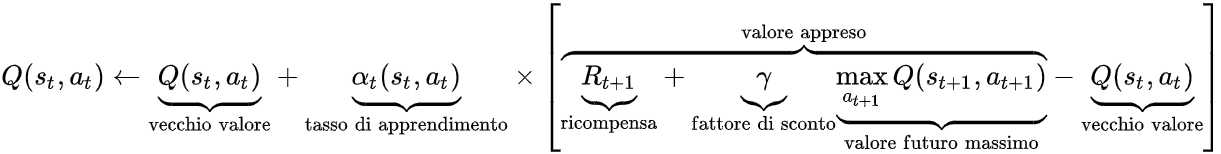


Chiaramente, per determinare una optimal policy è necessario scegliere ogni volta l’azione che produce il valore di Q maggiore.


**________________________________________**



Inoltre si dimostra che l'algoritmo converge se:
- il sistema può essere modellato come un framework Markoviano (le probabilità di transizione fra stati devono essere nota a priori)

-  i valori della ricompensa devono essere limitati da un valore costante c: $\hspace{0.2cm}$ $|r(s, a)| < c $

- l’agente deve selezionare le azioni in modo tale che ogni coppia (s, a) sia potenzialmente visitata un numero infinito di volte

In [ ]:
def rl():

    q_table = build_q_table(N_STATES, ACTIONS)  # inizializzazione della tabella q con tutti 0
    
    for episode in range(1,MAX_EPISODES+1):  # gli episodi sono una sequenza di transizioni fino al raggiungimento del Goal
        print(f'\n Episodio : {episode} \n' )
        step_counter = 1
        S = 1    # stato iniziale
  
        update_env(S)

        while S != 7 :

            A = choose_action(S, q_table)
            #print(f'\nStato attuale: {S}, Azione scelta: {A}')

            S_, R = env_feedback(S, A)  # Esegue un azione in un certo stato ed ottiene il reward ed i prossimo stato
            #print(f'Nuovo stato ottenuto: {S_}, Reward ottenuto dalla transizione : {R} ')
            
            q_old = q_table.loc[S, A]  # è il "vecchio valore" di Q nella formula sopra. Di fatto sono gli attuali valori della Q table per lo stato S"
            
            if S_ != 7:   # se non siano arrivati allo stato finale
                q_learn = R + GAMMA * q_table.iloc[S_, :].max()   #  trova il valore massimo del next state tra le due azioni disponibili
                # questo è il "valore appreso" di Q nella formula sopra.
            else:
                q_learn = R     # altrimenti abbiamo finito, siamo nello stato finale 
                

            q_table.loc[S, A] += ALPHA * (q_learn - q_old)  # aggiorna la stima della funzione Q attraverso approssimazioni iterative
            

            #print(f'Tabella Q \n {round(q_table,3)} ')


            S = S_  # muoviti al prossimo stato
            update_env(S)

            if S == 7 :
                print(f'\n \t Numero Episodi {episode}  Step totali {step_counter}\n ') 

            step_counter += 1

    return q_table

In [ ]:
if __name__ == "__main__":
    q_table = rl()
    print(f'Tabella Q \n {round(q_table,3)} ')
    print("\n ** Fine addestramento ** \n")


 Episodio : 1 

.......U
 	 Numero Episodi 1  Step totali 6
 

 Episodio : 2 

....U..G	  +++!exploitation!+++
....U..G	  +++!exploitation!+++
.....U.G	  +++!exploitation!+++
......UG	  +++!exploitation!+++
.......U
 	 Numero Episodi 2  Step totali 109
 

 Episodio : 3 

U......G	  +++!exploitation!+++
.U.....G	  +++!exploitation!+++
...U...G	  +++!exploitation!+++
....U..G	  +++!exploitation!+++
.....U.G	  +++!exploitation!+++
.....U.G	  +++!exploitation!+++
......UG	  +++!exploitation!+++
.......U
 	 Numero Episodi 3  Step totali 60
 

 Episodio : 4 

.U.....G	  +++!exploitation!+++
..U....G	  +++!exploitation!+++
...U...G	  +++!exploitation!+++
....U..G	  +++!exploitation!+++
.....U.G	  +++!exploitation!+++
.....U.G	  +++!exploitation!+++
......UG	  +++!exploitation!+++
.......U
 	 Numero Episodi 4  Step totali 8
 

 Episodio : 5 

.U.....G	  +++!exploitation!+++
...U...G	  +++!exploitation!+++
...U...G	  +++!exploitation!+++
...U...G	  +++!exploitation!+++
...U...G	  +++!exploitat

# Optimal policy

Qui sarà mostrata la policy ottenuta dall'addestramento precedente. Di fatto sfruttando la tabella Q

In [ ]:
def policy(q_table):

  step_counter = 1
  S = 1    # stato iniziale
  update_env(S)

  while S != 7 :

    state_actions = q_table.iloc[S]
    #print("")
    #print("\n",state_actions,"\n")
    A = state_actions.idxmax()
    
    S, R = env_feedback(S, A)

    update_env(S)

    if S == 7 :
         print(f'\n Step totali {step_counter}\n ') 

    step_counter += 1


In [ ]:
policy(q_table)

.......U
 Step totali 6
 


# Modulando diversamente gli iperparametri

In [ ]:
N_STATES = 8  # numero di stati
ACTIONS = ['sinistra', 'destra']     # azioni disponibili

#IPER-PARAMETRI
EPSILON = 0.81   # gestisci ϵ-greedy policy
ALPHA = 0.1      # learning rate
GAMMA = 0.9      # discount factor

MAX_EPISODES = 40   # episodi massimi
FRESH_TIME = 0.3    # fresh time display

In [ ]:
print(q_table)

   sinistra    destra
0  0.000000  0.005958
1  0.000211  0.169526
2  0.020184  0.325069
3  0.104797  0.465046
4  0.040691  0.659556
5  0.117890  0.847656
6  0.288724  0.985219
7  0.000000  0.000000


In [ ]:
EPSILON = 0.81   # gestisci ϵ-greedy policy
ALPHA = 0.1      # learning rate
GAMMA = 0.1      # discount factor

In [ ]:
print(q_table) #GAMMA = 0.1  dove i valori predominati sono nello stato 5 e 6. Molto bassi tutti gli altri 

       sinistra        destra
0  0.000000e+00  1.690645e-09
1  6.735730e-13  2.614330e-06
2  9.055290e-09  4.496585e-05
3  1.174883e-06  6.246055e-04
4  9.335158e-06  8.089074e-03
5  1.783729e-04  9.232708e-02
6  6.881895e-04  9.852191e-01
7  0.000000e+00  0.000000e+00


In [ ]:
EPSILON = 0.81   # gestisci ϵ-greedy policy
ALPHA = 0.1      # learning rate
GAMMA = 0.5 

In [ ]:
print(q_table) # GAMMA = 0.5 

       sinistra    destra
0  4.226563e-10  0.000625
1  2.491766e-05  0.008455
2  6.083577e-04  0.026977
3  2.310078e-04  0.079557
4  4.340388e-03  0.203910
5  1.695573e-02  0.464940
6  4.881299e-02  0.985219
7  0.000000e+00  0.000000


In [ ]:
EPSILON = 0.81   # gestisci ϵ-greedy policy
ALPHA = 0.8      # learning rate
GAMMA = 0.9 

In [ ]:
print(q_table) # ALPHA = 0.8

   sinistra    destra
0  0.228537  0.488635
1  0.244586  0.590490
2  0.531429  0.656100
3  0.585529  0.729000
4  0.647399  0.810000
5  0.718950  0.900000
6  0.630374  1.000000
7  0.000000  0.000000


# Problema RL più articolato

Nuovo Ambiente, e nuovi obbiettivi:

L'agente "U", partendo dallo stato "I", deve imparare a raggiungere lo stato "B" (Bottino )e poi uscire nello stato "G" (Goal), muovendosi a destra o sinistra.

[. B . I . . . G]

Ambiente :
- Insieme finito di 8 stati,  S: [0,1,2,3,4,5,6,7]. Dove l'ultimo stato, il 7, è il Goal da raggiungere. Stato iniziale S = 3
- Insieme di finito di 2 azioni discrete,  A : ["desta", "sinistra"]
- Funzione di transizione da uno stato all'altro, deterministica :  
   - input: (azione "destra", stato S)     -> output :      S+1
   - input: (azione "sinistra", stato S)   -> output :    S-1
   - input: (azione "sinistra", stato S=0) -> output :  S=0
   - Stato S = 7, fine.
- Segnale di Reward R(S,A). Cioè la ricompensa ottenuta partendo dallo stato S agendo secondo l’azione A. Anche questa funzione è determinisitca : 
    - per ogni spostamento; reward immediato = 0
    - in caso di raggiugimento dello stato S = 1 , reward immediato = + 0.3, se Flag "Prima_volta == True "; altrimenti: reward immediato = 0
    - in caso di raggiugimento dello stato S = 7 , reward immediato = +1

*Soluzione*

Per risolvere questo ambiente sono necessarie due q_table. La prima per raggiungere il Bottino, cioè lo stato S1. La seconda, una volta ottenuto il Bottino (e lo Stato S1 ha come valore di reward = 0, come tutti gli altri stati), per raggiungere lo stato Goal.  